<a href="https://colab.research.google.com/github/joan-chep/WEEK_4_IP_CORE/blob/main/Moringa_Data_Science_Core_W4_Independent_Project_2022_01_Joan_Chepkwony.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A PYTHON PROJECT TO UNDERSTAND ELECTRIC CAR USAGE.

1.EXPLORATORY DATA ANALYSIS

Importing Libraries

In [ ]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

import pandas_profiling as pp

from scipy import stats

from scipy.stats import norm

from scipy.stats import t

import math

from scipy.stats import ttest_ind

from statsmodels.stats import weightstats as stests

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Loading our Dataset

In [ ]:
dfjosw = pd.read_csv("http://bit.ly/DSCoreAutolibDataset")

In [ ]:
#viewing our first five entries
dfjosw.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
#viewing our last five entries
dfjosw.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
#checking information of our dataset
dfjosw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [ ]:
#checking for the columns names in our dataset
dfjosw.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [ ]:
#checking for the shape of our dataset
dfjosw.shape

(16085, 13)

In [ ]:
#checking for the datatypes
dfjosw.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [ ]:
#checking for the description
dfjosw.describe

<bound method NDFrame.describe of        Postal code       date  ...  Slots_freed_sum  Slots_taken_sum
0            75001   1/1/2018  ...               22               20
1            75001   1/2/2018  ...               23               22
2            75001   1/3/2018  ...               27               27
3            75001   1/4/2018  ...               25               21
4            75001   1/5/2018  ...               18               20
...            ...        ...  ...              ...              ...
16080        95880  6/15/2018  ...                0                0
16081        95880  6/16/2018  ...                0                0
16082        95880  6/17/2018  ...                0                0
16083        95880  6/18/2018  ...                0                0
16084        95880  6/19/2018  ...                0                0

[16085 rows x 13 columns]>

In [ ]:
#checking for any unique items
dfjosw.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

Partitioning our dataframe into weekdays only.

In [ ]:

dfjos = dfjosw[dfjosw['day_type'] == 'weekday']

In [ ]:
#checking the shape of our dataframe
print(dfjos.shape)

(11544, 13)


In [ ]:
#checking the first five values of our new dataframe
dfjos.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


Data Cleaning.


In [ ]:
#removing spaces in the column names
dfjos.columns = dfjos.columns.str.lower().str.replace(" ", "")

In [ ]:
#checking the column names
dfjos.columns

Index(['postalcode', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [ ]:
#dropping columns
dfjos.drop(['utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#checking the columns we have remained with
dfjos.head()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,18,20


In [ ]:
#checking for missing values
dfjos.isnull().sum()

postalcode               0
date                     0
n_daily_data_points      0
dayofweek                0
day_type                 0
bluecars_taken_sum       0
bluecars_returned_sum    0
slots_freed_sum          0
slots_taken_sum          0
dtype: int64

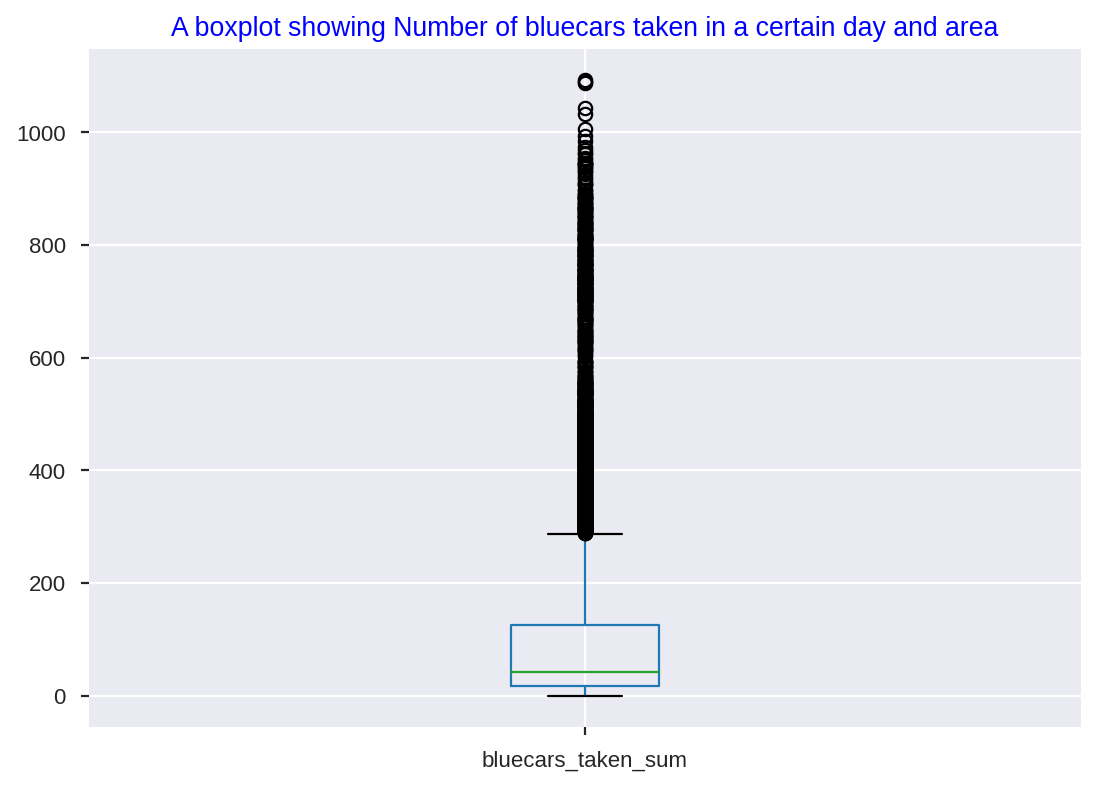

In [ ]:
#checking for outliers
plt.figure(dpi = 160)
dfjos.boxplot(['bluecars_taken_sum'])
plt.title("A boxplot showing Number of bluecars taken in a certain day and area", color = 'blue')
plt.show()

#our results shows that we do have outliers

UNIVARIATE ANALYSIS.

Hiatogram Visualizations

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


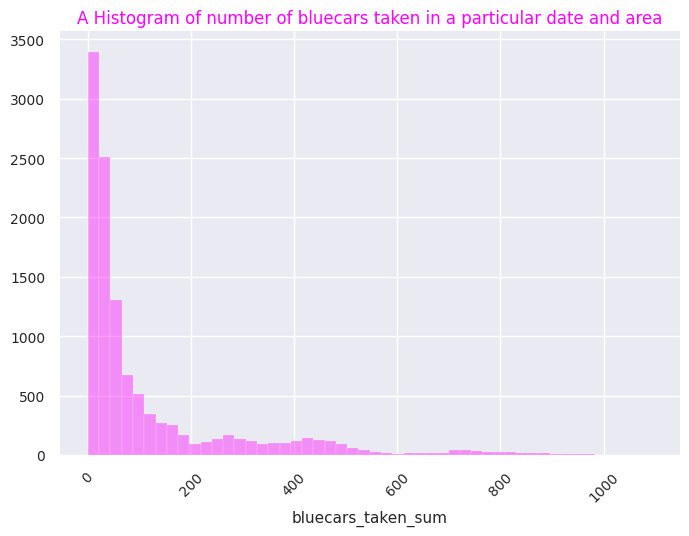

In [ ]:
plt.figure(dpi = 100)
sns.set_style("darkgrid")
sns.distplot(dfjos["bluecars_taken_sum"], kde = False, color = 'magenta')
plt.title("A Histogram of number of bluecars taken in a particular date and area", color = 'magenta')
plt.xticks(rotation = 45)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


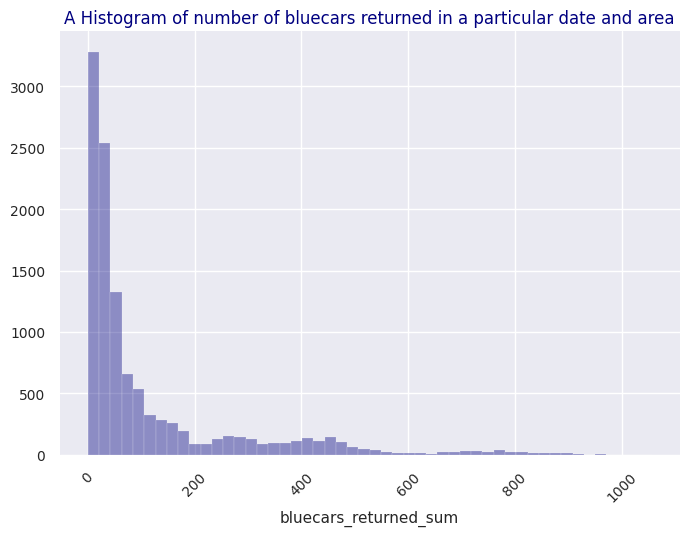

In [ ]:
plt.figure(dpi = 100)
sns.set_style("darkgrid")
sns.distplot(dfjos["bluecars_returned_sum"], kde = False, color = 'navy')
plt.title("A Histogram of number of bluecars returned in a particular date and area", color = 'navy')
plt.xticks(rotation = 45)
plt.show()

Using Bar Charts for Visualizations

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


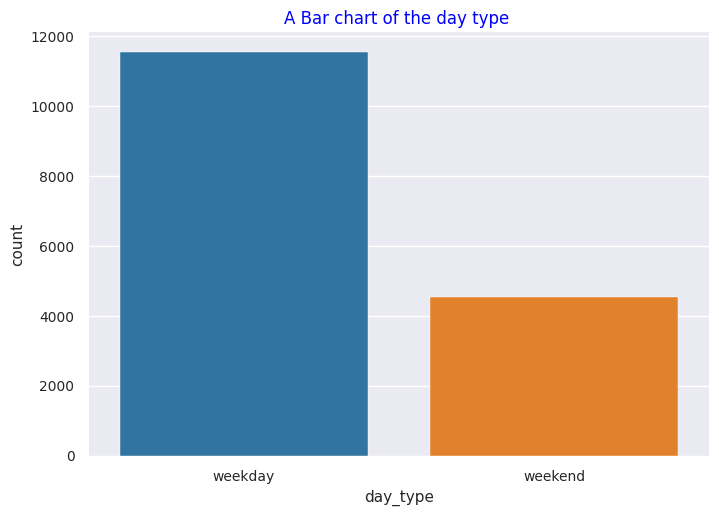

In [ ]:
#displaying using a bar chart
plt.figure(dpi = 100)
sns.set_style('darkgrid')
sns.countplot(dfjosw.day_type)
plt.title('A Bar chart of the day type ', color = 'blue')
plt.show()

In [ ]:
#converting day of the week from numerical to strings
dfjos['dayofweek'] = dfjos.dayofweek.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#checking the first five columns
dfjos.head()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,Monday,weekday,110,103,22,20
1,75001,1/2/2018,1438,Tuesday,weekday,98,94,23,22
2,75001,1/3/2018,1439,Wednesday,weekday,138,139,27,27
3,75001,1/4/2018,1320,Thursday,weekday,104,104,25,21
4,75001,1/5/2018,1440,Friday,weekday,114,117,18,20


In [ ]:
#checking the last five columns
dfjos.tail()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
16078,95880,6/13/2018,1440,Wednesday,weekday,12,13,0,0
16079,95880,6/14/2018,1439,Thursday,weekday,15,13,0,0
16080,95880,6/15/2018,1440,Friday,weekday,15,10,0,0
16083,95880,6/18/2018,1440,Monday,weekday,11,14,0,0
16084,95880,6/19/2018,1370,Tuesday,weekday,2,2,0,0


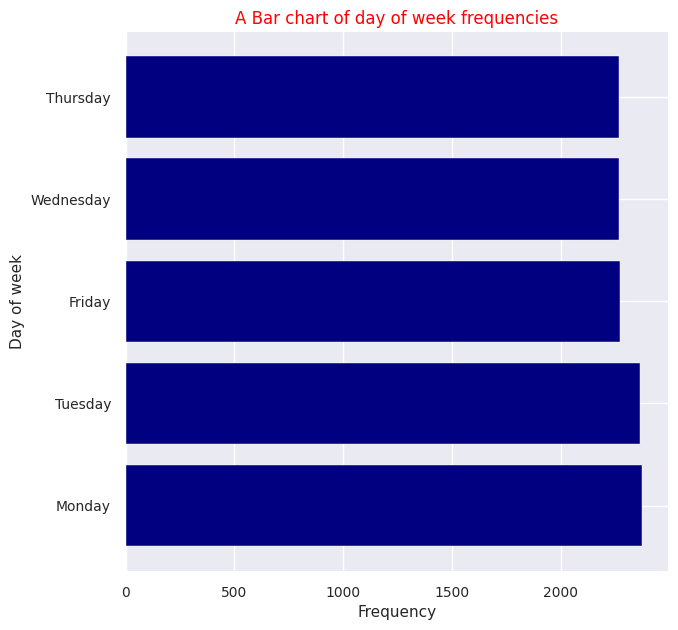

In [ ]:
#plotting a horizontal bar plot
day = dfjos.dayofweek.value_counts()
day

# labels
sizes= day.index
sizes

# values
data = day.values
data
#displaying our chart
plt.figure(figsize = (7,7), dpi = 100)
plt.barh(sizes, data, color = 'navy')
plt.ylabel("Day of week")
plt.xlabel('Frequency')
plt.title("A Bar chart of day of week frequencies", color = 'Red')
plt.show()


Visualizations using Pie Charts.

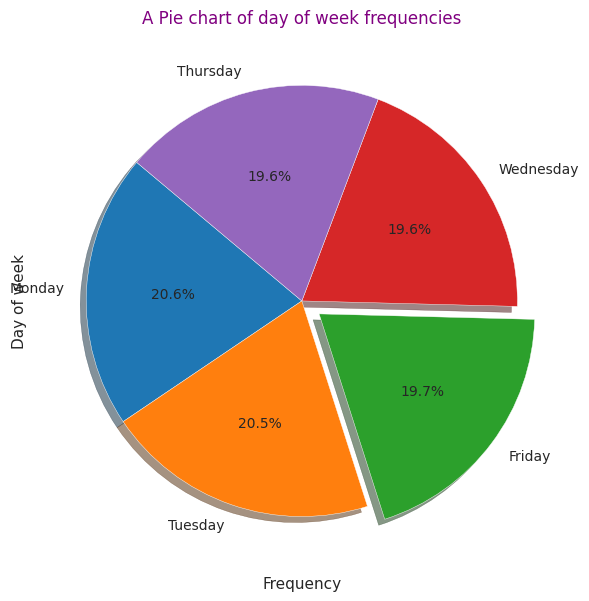

In [ ]:
#plotting a pie chart
day2 = dfjos.dayofweek.value_counts()
day2
# labels
sizes2= day.index
sizes2
# values
data2 = day.values
data2
#displaying our pie chart
plt.figure(figsize = (7,7), dpi = 100)
plt.pie(data2, labels = sizes2, autopct = '%1.1f%%', shadow = True, explode = (0,0,0.1,0,0), startangle = 140)
plt.ylabel("Day of week")
plt.xlabel('Frequency')
plt.title("A Pie chart of day of week frequencies", color = 'purple')
plt.show()

Frequency Tables.

In [ ]:
#making a crosstab and naming the count column
s = pd.crosstab(index = dfjos['n_daily_data_points'], columns = 'count')
s

col_0,count
n_daily_data_points,
1174,104
1203,103
1320,103
1364,103
1370,94
1377,102
1389,103
1398,104
1411,104


In [ ]:
# Frequency table of charging slots released vs slots taken
dfjos.groupby('dayofweek')[['slots_freed_sum', 'slots_taken_sum']].count()

# From the table the number of charging slots released vs the slots taken is equal

,slots_freed_sum,slots_taken_sum
dayofweek,,
Friday,2271,2271
Monday,2374,2374
Thursday,2268,2268
Tuesday,2363,2363
Wednesday,2268,2268


In [ ]:
# Frequency table showing sums of bluecars taken vs bluecars returned by day of week

dfjos.groupby('dayofweek')[['bluecars_taken_sum' ,'bluecars_returned_sum']].sum()

#from the table not all cars taken in day are returned the same day

,bluecars_taken_sum,bluecars_returned_sum
dayofweek,,
Friday,288546,286029
Monday,263893,264808
Thursday,263207,262961
Tuesday,261940,260470
Wednesday,261849,260673


In [ ]:
# Frequency table showing sum of bluecars taken by day of week in ascending order.

dfjos.groupby('dayofweek')['bluecars_taken_sum'].sum().sort_values()

#from the table friday is the day most bluecars were taken

dayofweek
Wednesday    261849
Tuesday      261940
Thursday     263207
Monday       263893
Friday       288546
Name: bluecars_taken_sum, dtype: int64

In [ ]:
# Frequency table showing sum of bluecars returned by day of week in ascending order.

dfjos.groupby('dayofweek')['bluecars_returned_sum'].sum().sort_values()

#from the table is the day when most bluecars were returned

dayofweek
Tuesday      260470
Wednesday    260673
Thursday     262961
Monday       264808
Friday       286029
Name: bluecars_returned_sum, dtype: int64

In [ ]:
# Frequency table showing sum of charging slots released by day of week in ascending order.

dfjos.groupby('dayofweek')['slots_freed_sum'].sum().sort_values()

#from the table friday is the day when most bluecars were released from cahrging slots

dayofweek
Monday       47022
Tuesday      47095
Wednesday    47331
Thursday     48200
Friday       52143
Name: slots_freed_sum, dtype: int64

In [ ]:
# Frequency table showing sum of charging slots taken by day of week in ascending order.

dfjos.groupby('dayofweek')['slots_taken_sum'].sum().sort_values()

# from the table friday is the day when bluecars were taken to the charging slots

dayofweek
Tuesday      46969
Monday       47068
Wednesday    47223
Thursday     48023
Friday       52234
Name: slots_taken_sum, dtype: int64

In [ ]:
# Frequency table of postal codes in ascending order

dfjos.postalcode.value_counts().sort_values()

93390     59
93200     90
93370    105
92340    105
93150    107
        ... 
75012    112
75004    112
78150    112
93700    112
94160    112
Name: postalcode, Length: 104, dtype: int64

Measures of Central Tendancy

Mean

In [ ]:
#using for loops
cols = ['n_daily_data_points', 'bluecars_taken_sum', 'bluecars_returned_sum', 'slots_freed_sum',
       'slots_taken_sum']



for column in cols:
  print("\n")
  print('The mean ' + column + ' is : ' + str(dfjos[column].mean()))



The mean n_daily_data_points is : 1430.0072765072764


The mean bluecars_taken_sum is : 116.0286729036729


The mean bluecars_returned_sum is : 115.63937976437977


The mean slots_freed_sum is : 20.94516632016632


The mean slots_taken_sum is : 20.921431046431046


Mode

In [ ]:
#using for loops

for column in cols:
  print('\n')
  print('The Mode of ' + column + ' is ; ' + str(dfjos[column].mode()))



The Mode of n_daily_data_points is ; 0    1440
dtype: int64


The Mode of bluecars_taken_sum is ; 0    12
dtype: int64


The Mode of bluecars_returned_sum is ; 0    12
dtype: int64


The Mode of slots_freed_sum is ; 0    0
dtype: int64


The Mode of slots_taken_sum is ; 0    0
dtype: int64


Median

In [ ]:
#using for loops
for column in cols:
  print('\n')
  print('The median of ' + column + ' is ; ' + str(dfjos[column].median()))



The median of n_daily_data_points is ; 1440.0


The median of bluecars_taken_sum is ; 42.0


The median of bluecars_returned_sum is ; 42.0


The median of slots_freed_sum is ; 0.0


The median of slots_taken_sum is ; 0.0


Measures of Dispersion

Range

In [ ]:
#finding the range
def column_range(column):            
  max_value = dfjos[column].max()             
  min_value = dfjos[column].min()              
  col_range = max_value - min_value        
  return col_range                   

for column in cols:                              
  print('\n')                                                 
  print('The '+ column + ' range is: ' + str(column_range(column))) 



The n_daily_data_points range is: 266


The bluecars_taken_sum range is: 1093


The bluecars_returned_sum range is: 1056


The slots_freed_sum range is: 288


The slots_taken_sum range is: 294


Interquartile Range

In [ ]:
#finding the interquartile range
for column in cols:
  print('\n')
  print(dfjos[column].quantile([0.25, 0.5, 0.75]))



0.25    1439.0
0.50    1440.0
0.75    1440.0
Name: n_daily_data_points, dtype: float64


0.25     18.0
0.50     42.0
0.75    126.0
Name: bluecars_taken_sum, dtype: float64


0.25     19.0
0.50     42.0
0.75    126.0
Name: bluecars_returned_sum, dtype: float64


0.25    0.0
0.50    0.0
0.75    4.0
Name: slots_freed_sum, dtype: float64


0.25    0.0
0.50    0.0
0.75    5.0
Name: slots_taken_sum, dtype: float64


Variance

In [ ]:
#finding the variance
for column in cols:
  print('\n')
  print('The Variance of ' + column + ', is :  ' + str(dfjos[column].var()))



The Variance of n_daily_data_points, is :  1360.2922454103737


The Variance of bluecars_taken_sum, is :  28773.286798001394


The Variance of bluecars_returned_sum, is :  28339.955274881388


The Variance of slots_freed_sum, is :  2294.4298960655037


The Variance of slots_taken_sum, is :  2289.4865925640042


Standard Deviation

In [ ]:
#finding the standard deviation

for column in cols:
  print('\n')
  print('The Standard Deviation of ' + column + ', is :  ' + str(dfjos[column].std()))



The Standard Deviation of n_daily_data_points, is :  36.88213992449968


The Standard Deviation of bluecars_taken_sum, is :  169.62690469970084


The Standard Deviation of bluecars_returned_sum, is :  168.34475125432746


The Standard Deviation of slots_freed_sum, is :  47.90020768290576


The Standard Deviation of slots_taken_sum, is :  47.84857983852817


Kurtosis

In [ ]:
#calculating kurtosis of each column
for column in cols:
  print('\n')
  print('The Kurtosis of ' + column + ', is :  ' + str(dfjos[column].kurt()))



The Kurtosis of n_daily_data_points, is :  31.654407529009344


The Kurtosis of bluecars_taken_sum, is :  5.553808116768028


The Kurtosis of bluecars_returned_sum, is :  5.5428632223425325


The Kurtosis of slots_freed_sum, is :  6.007229901401457


The Kurtosis of slots_taken_sum, is :  6.001264705133703


Skewness

In [ ]:
#calculating skewness of each column
for column in cols:
  print('\n')
  print('The Skewness of ' + column + ', is :  ' + str(dfjos[column].skew()))



The Skewness of n_daily_data_points, is :  -5.449575600011862


The Skewness of bluecars_taken_sum, is :  2.3281979815185876


The Skewness of bluecars_returned_sum, is :  2.3289726516394973


The Skewness of slots_freed_sum, is :  2.5421869688795278


The Skewness of slots_taken_sum, is :  2.5423463886866187


Bivariate Analysis

Visualizations using Scatter Plots

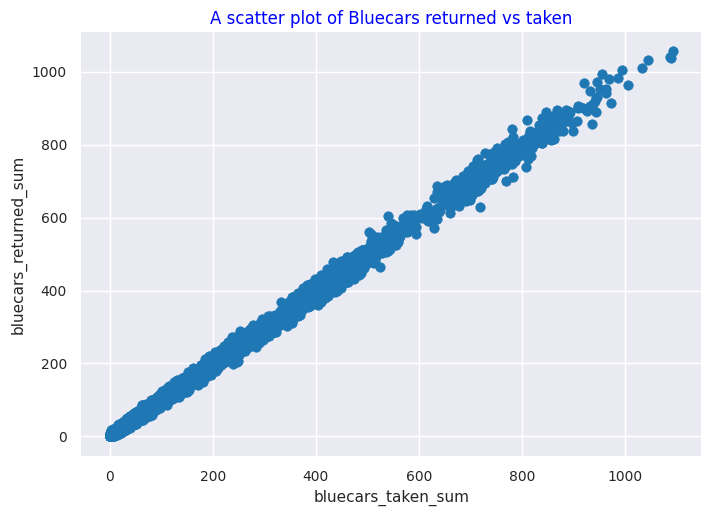

In [ ]:
#plotting scatter plot
plt.figure(dpi = 100)
plt.scatter(dfjos['bluecars_taken_sum'], dfjos['bluecars_returned_sum'])
plt.title('A scatter plot of Bluecars returned vs taken', color = 'blue')
plt.xlabel('bluecars_taken_sum')
plt.ylabel('bluecars_returned_sum')
plt.show()

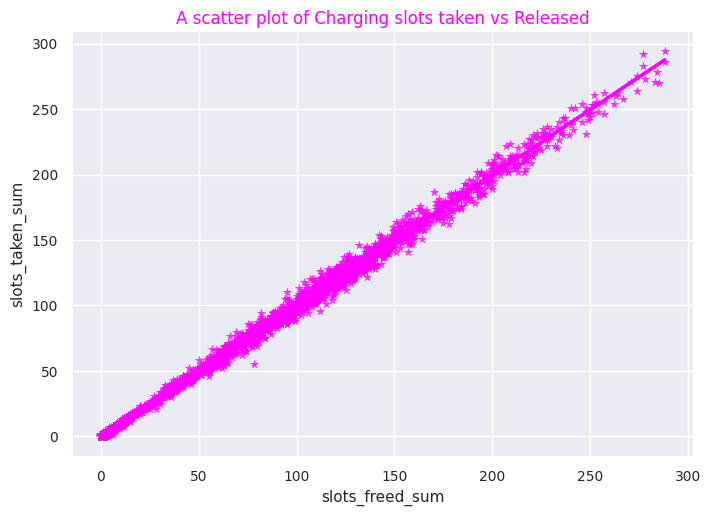

In [ ]:
#plotting using seaborn
plt.figure(dpi = 100)
sns.regplot(x = dfjos["slots_freed_sum"], y = dfjos["slots_taken_sum"], fit_reg=True, color = 'magenta', marker = '*')
plt.title("A scatter plot of Charging slots taken vs Released", color = 'magenta')
plt.show()

Visualizations using Line Charts

Simple Random Sampling.

In [ ]:
#creating a new dataframe containing our simple random sample 
#sample size = 3000
dfjos1 = dfjos.sample(n = 3000, replace = 'False')

In [ ]:
#confriming the size of our sample by viewing the first five columns


print(dfjos1.shape)

dfjos1.head()

(3000, 9)


,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
2558,75017,3/7/2018,1440,Wednesday,weekday,741,733,196,200
13352,94110,3/19/2018,1440,Monday,weekday,36,39,0,0
10683,93170,4/11/2018,1439,Wednesday,weekday,41,37,0,0
7589,92310,4/18/2018,1377,Wednesday,weekday,37,45,0,0
2483,75016,6/7/2018,1439,Thursday,weekday,832,855,227,232


In [ ]:
#converting the date column to datetime format

dfjos1['date'] = pd.to_datetime(dfjos1.date)

Stratified Sampling

In [ ]:
#creating a new column called month

dfjos1['month'] = pd.DatetimeIndex(dfjos1['date']).month  

In [ ]:
#checking the new column created

dfjos1.head()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum,month
2558,75017,2018-03-07,1440,Wednesday,weekday,741,733,196,200,3
13352,94110,2018-03-19,1440,Monday,weekday,36,39,0,0,3
10683,93170,2018-04-11,1439,Wednesday,weekday,41,37,0,0,4
7589,92310,2018-04-18,1377,Wednesday,weekday,37,45,0,0,4
2483,75016,2018-06-07,1439,Thursday,weekday,832,855,227,232,6


In [ ]:
#selecting a stratified sample by month

strat_sample = dfjos1.groupby(['month'],group_keys = False).apply(lambda month : month.sample(frac = 0.5))

In [ ]:
#checking the new stratified sample selected

print(strat_sample.shape)

strat_sample.head()

(1499, 10)


,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum,month
5943,92200,2018-01-19,1440,Friday,weekday,60,63,0,0,1
5153,92140,2018-01-09,1439,Tuesday,weekday,81,76,0,0,1
4373,92000,2018-01-08,1438,Monday,weekday,120,124,0,0,1
15001,94450,2018-01-09,1439,Tuesday,weekday,4,6,0,0,1
11041,93260,2018-01-18,1439,Thursday,weekday,39,40,6,6,1


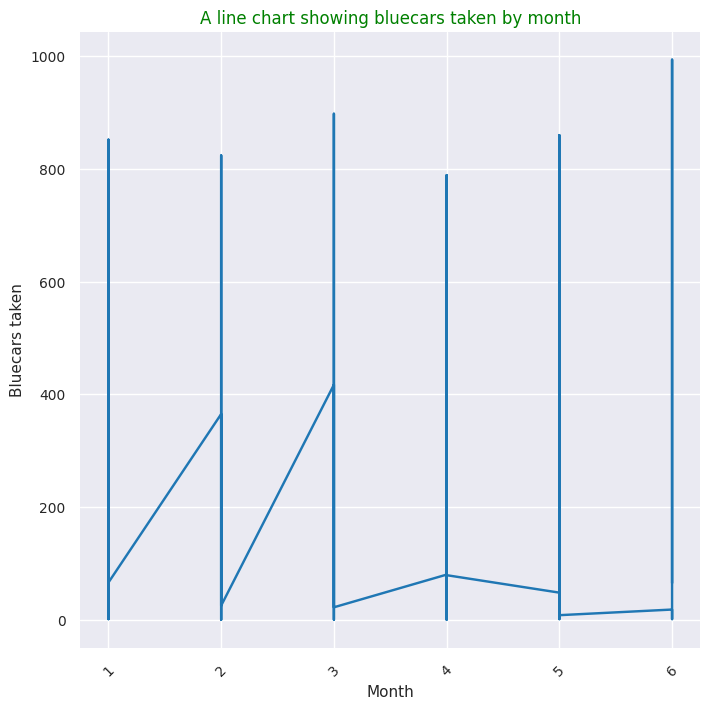

In [ ]:
#line chart of the bluecars taken by month
plt.figure(figsize = (8,8), dpi = 100)
plt.plot(strat_sample.month, strat_sample.bluecars_taken_sum)
plt.xticks(rotation = 45)
plt.title('A line chart showing bluecars taken by month', color = 'Green')
plt.xlabel('Month')
plt.ylabel('Bluecars taken')
plt.show()

Pearson Correlation

In [ ]:
#Calculating the pearson coefficient

dfjos.corr()

,postalcode,n_daily_data_points,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
postalcode,1.000000,0.000174,-0.701709,-0.701877,-0.754730,-0.754422
n_daily_data_points,0.000174,1.000000,0.026295,0.026691,0.020497,0.021045
bluecars_taken_sum,-0.701709,0.026295,1.000000,0.998780,0.945700,0.944855
bluecars_returned_sum,-0.701877,0.026691,0.998780,1.000000,0.945758,0.946006
slots_freed_sum,-0.754730,0.020497,0.945700,0.945758,1.000000,0.999154
slots_taken_sum,-0.754422,0.021045,0.944855,0.946006,0.999154,1.000000


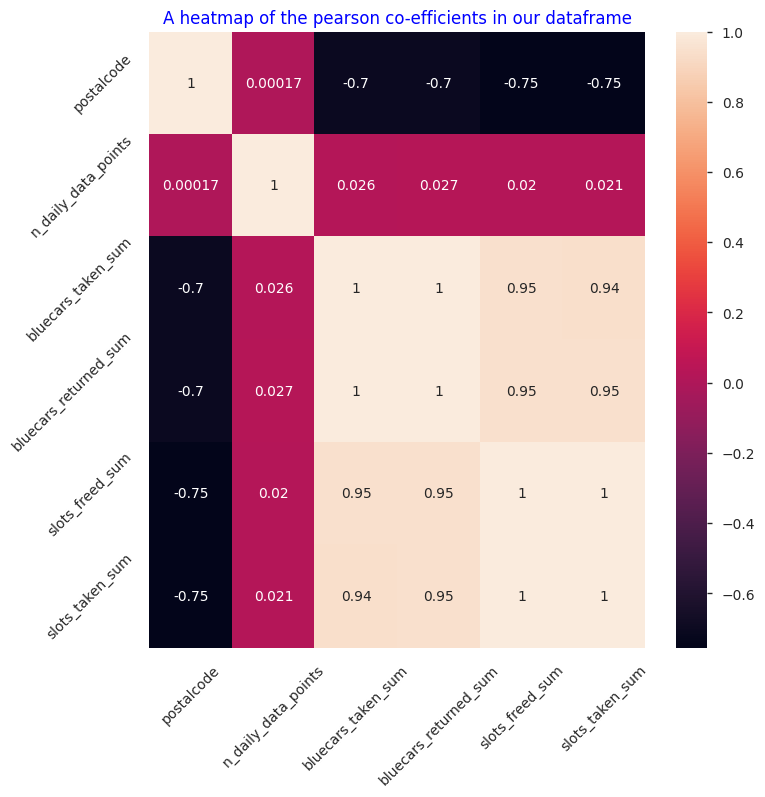

In [ ]:
#plotting a heatmap
x = dfjos.corr()
plt.figure(figsize = (8,8), dpi = 100)
sns.heatmap(x, xticklabels = x.columns, yticklabels=x.columns, annot = True)
plt.title('A heatmap of the pearson co-efficients in our dataframe', color = "blue")
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

Hypothesis Testing

In [ ]:
# Using a Z test to conduct our Hypothesis.
# It is the appropriate test to use here since we have a dataset larger than 30 observations.
# Selecting two postal codes using simple random sampling

h_sample = dfjos.sample(n = 2, replace = False)
h_sample

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
13755,94140,1/10/2018,1440,Wednesday,weekday,37,45,0,0
9360,92500,1/18/2018,1439,Thursday,weekday,133,126,0,0


In [ ]:
# STEP 1

# Stating the Hypothesis


# H0 : The difference in the mean of blue cars taken in postal code 75006 and 75012 is 0
# H1 : The difference in the mean of blue cars taken in postal code 75006 and 75012 is not 0


## OR


# H0 : U1 = U2
# Ha : U1 ≠ U2

In [ ]:
# STEP 2

# Level of significance
# α = 0.05

In [ ]:
# Creating a dataframe containing the 75012 postal code as p1

p1 = dfjos[dfjos['postalcode'] == 75012]
p1.head()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
1716,75012,1/1/2018,1440,Monday,weekday,502,512,122,120
1717,75012,1/2/2018,1438,Tuesday,weekday,406,412,109,109
1718,75012,1/3/2018,1439,Wednesday,weekday,427,423,92,95
1719,75012,1/4/2018,1320,Thursday,weekday,395,392,91,94
1720,75012,1/5/2018,1440,Friday,weekday,476,478,114,118


In [ ]:
# Creating a dataframe containing the 75006 postal code as p2

p2 = dfjos[dfjos['postalcode'] == 75006]
p2.head()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
780,75006,1/1/2018,1440,Monday,weekday,215,197,34,31
781,75006,1/2/2018,1438,Tuesday,weekday,190,192,34,38
782,75006,1/3/2018,1439,Wednesday,weekday,208,207,30,25
783,75006,1/4/2018,1320,Thursday,weekday,176,179,32,30
784,75006,1/5/2018,1440,Friday,weekday,262,261,49,45


In [ ]:
# # STEP 3

# Calculating the test statistic
# Applying the conditions for an appropriate decision.

ztest , pval1 = stests.ztest(p1['bluecars_taken_sum'], x2= p2['bluecars_taken_sum'], value=0, alternative='two-sided')

print(float(pval1))

if pval1 < 0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

3.571771542382906e-172
reject null hypothesis


In [ ]:
# STEP 4 

# Evaluating our results

# The p-value = 3.571771542382906e-172

# this p-value is a very small value and it is less that the level of significance (0.05)

# Hence we Reject the Null Hypothesis

In [ ]:
# STEP 5

# Interpreting the results

# There is sufficient evidence to conclude that the difference in the means of blue cars taken in postal code 75012 and 75006 is not 0.

# The test was statistically significant.